# Train example notebook

This notebook is used to implement the training of a neural network for classification of `Cloud`, `Edge`, `Good` images. <br> It is advisable to use this notebook to get practice and debug your code. To speed up the execution, once you are ready, you should move to a scripted version.

## 1. - Imports

Select `CUDA_VISIBLE_DEVICES` to the `Graphics Proceesing Unit (GPU)` index that you want to use to enable the use of GPU.

In [30]:
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="0" # GPU index

Enabling autoreload of different packages.

In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import torch 
import sys
sys.path.insert(1, os.path.join("..", "data"))
sys.path.insert(1, os.path.join("..", "utils"))
from data_utils import Dataset
from plot_utils import plot_image
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

## 2. - Datasets

### 2.1 - Creating datasets

Now we read the images from the target directory `path_data`. Set `path_data` to the directory containing the `Cloud`, `Edge`, `Good` subfolders.  Moreover, it will automatically split the total dataset into the train, cross validation and test splits by using a pseudo-random splitting algorithm. You can reproduce the split by specifying the variable `seed`. **NB**:
- The train split contains 70% of the whole images.
- The valid splits contains 15% of the whole images.
- The test splits contains 15% of the whole images.
<br>**YOU MUST NOT CHANGE THE TEST SPLIT SIZE!!!**

In [33]:
# Path to the data folder (update the variable to your path).
path_data=os.path.join("..", "data")
# Seed value
seed=22

<img src="utilities/images/danger_icon.png" style="margin:auto"/>

**N.B** Make sure to have created a dataset split into the three directories `Cloud`, and `Good`, `Edge`. Otherwise, the next cell will **fail!** <br>


In [34]:
dataset=Dataset(path_data=path_data, seed=seed)
dataset.read_data()

Parsing class: Cloud: 141it [00:09, 15.49it/s]
Parsing class: Edge: 97it [00:05, 18.04it/s]
Parsing class: Good: 66it [00:04, 14.74it/s]


**Hint:** before proceeding, make sure that your `Edge`,`Cloud`, and `Good` samples are well enough among the `train`, `valid`,`test` splits. To print datasets statistics, run the next line.  Remember that the number of images in the different splits is distributed as described above. <br> If you are not happy with the data distribution, you can update the seed used and create a new dataset by rerunning the cell above. 

In [35]:
dataset.get_statistics()

,train,valid,test
cloud,99,23,19
edge,70,15,12
good,43,8,15


### 2.2. - Create data loaders.

The next lines will create a dataloader. A data loader is used to break the dataset into batches of a size `batch_size`. <br> This is useful to ensure that your dataset will fit into your memory and to create a "stochastic" implementation of gradient descent. <br> For more information, please, check: [data loader](https://www.educative.io/answers/what-is-pytorch-dataloader).<br>
Specify `batch_size` (**Hint**: use powers of 2. Typical values are between 8 and 64).

In [36]:
batch_size=32

In [37]:
# Train loader
train_loader = DataLoader(dataset.get_split("train"), batch_size=batch_size, pin_memory=False, shuffle=True)
# Cross validation data loader
valid_loader = DataLoader(dataset.get_split("valid"), batch_size=batch_size, pin_memory=False, shuffle=True)
# Test data loader
test_loader = DataLoader(dataset.get_split("test"), batch_size=batch_size, pin_memory=False, shuffle=True)

## 3 - Training

Now, it is your turn! Add your code below to load a Neural Network model, select optimizers, learning rate and perform training. <br>
Good luck!

...

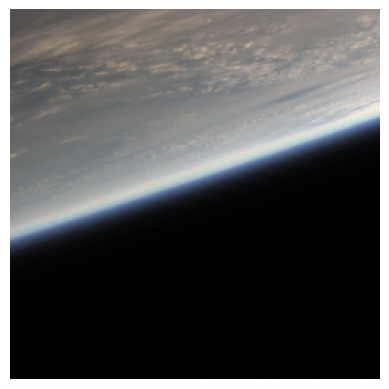

In [106]:
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid 
import torch.nn.functional as F 

def resize_tensor_images(images, size=(256, 256)):
    # Resize the batch of images
    return F.interpolate(images, size=size, mode='bilinear', align_corners=False)

def normalize_individual_image(image):
    # Calculate the mean and std for each channel of the image
    mean = image.mean(dim=[1, 2])
    std = image.std(dim=[1, 2])

    # Ensure std is not zero to avoid division by zero
    std = std.clamp(min=1e-9)

    # Normalize the image
    normalized_image = (image - mean[:, None, None]) / std[:, None, None]
    return normalized_image
    
def tensor_to_numpy(tensor):
    # Rescale the tensor to 0-1 range
    tensor = tensor - tensor.min()
    tensor = tensor / tensor.max()
    # Move the tensor to CPU if it's on GPU
    tensor = tensor.cpu()

    # Convert to numpy and transpose from CxHxW to HxWxC for visualization
    numpy_image = tensor.numpy()
    numpy_image = np.transpose(numpy_image, (1, 2, 0))

    return numpy_image

for batch in train_loader:
    images, labels = batch

    resized_images = resize_tensor_images(images)

    # Normalize each image in the batch
    normalized_images = torch.stack([normalize_individual_image(img) for img in resized_images])

first_image_tensor = normalized_images[0]

# Convert the tensor to a NumPy array
first_image_numpy = tensor_to_numpy(first_image_tensor)

# Display the image
plt.imshow(first_image_numpy)
plt.axis('off')  # Remove axis markers
plt.show()
